In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Inferencing Border Crossing Data with Covid Confirmed/ Death Cases for New York State

# Reading Data

In [2]:
master_us_confirmed = pd.read_csv('./data/US_confirmed.csv')
master_us_death = pd.read_csv('./data/US_deaths.csv')
master_ny_bordercrossing_data = pd.read_csv('./data/Monthly_Table_Full_Data_data.csv', encoding='UTF-16', sep='\t')

# Master US Confirmed Cases Dataset

In [3]:
master_us_confirmed.head()

,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03
0,AK,0,0,0,0,0,0,0,0,0,...,59448,59627,59627,59627,59627,60248,60248,60628,60823,60823
1,AL,0,0,0,0,0,0,0,0,0,...,513161,513605,514098,514415,514642,515015,515423,515893,516309,516662
2,AR,0,0,0,0,0,0,0,0,0,...,329515,329700,329865,329934,330013,330188,330401,330611,330756,330972
3,AZ,0,0,0,0,1,1,1,1,1,...,838016,838719,839892,840492,840614,841192,841884,842273,843174,844328
4,CA,0,0,0,0,2,3,3,4,4,...,3563340,3564383,3564476,3564476,3564476,3564476,3564476,3570718,3573028,3577951


# Master US Death Cases Dataset

In [4]:
master_us_death.head()

,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03
0,AK,0,0,0,0,0,0,0,0,0,...,298,298,298,298,298,298,298,298,298,298
1,AL,0,0,0,0,0,0,0,0,0,...,10511,10527,10530,10530,10530,10532,10558,10558,10611,10640
2,AR,0,0,0,0,0,0,0,0,0,...,5625,5636,5642,5646,5649,5661,5669,5678,5679,5681
3,AZ,0,0,0,0,0,0,0,0,0,...,16843,16900,16918,16918,16921,16942,16968,16979,16998,17005
4,CA,0,0,0,0,0,0,0,0,0,...,57336,57551,57746,57778,57778,57778,57778,58094,58271,58429


# Master Border Crossing Dataset

In [5]:
master_ny_bordercrossing_data.head()

,Port Name,Measure,Year,Month of Date,Border,State,__Id,Date,Period (date),Period (string),Port,Port Code,Number of Records,Value
0,Alexandria Bay,Bus Passengers,2020,January,US-Canada Border,New York,row-h9y2.9jia_t9wc,1/1/2020 12:00:00 AM,1/1/2020 12:00:00 AM,2020,"Alexandria Bay, New York",708,1,1116
1,Buffalo Niagara Falls,Bus Passengers,2020,January,US-Canada Border,New York,row-gvb2-xbpg.y544,1/1/2020 12:00:00 AM,1/1/2020 12:00:00 AM,2020,"Buffalo Niagara Falls, New York",901,1,15533
2,Champlain Rouses Point,Bus Passengers,2020,January,US-Canada Border,New York,row-5vdy_g9cq-s7xq,1/1/2020 12:00:00 AM,1/1/2020 12:00:00 AM,2020,"Champlain Rouses Point, New York",712,1,11504
3,Massena,Bus Passengers,2020,January,US-Canada Border,New York,row-fgyx~g5h7-ruee,1/1/2020 12:00:00 AM,1/1/2020 12:00:00 AM,2020,"Massena, New York",704,1,3095
4,Ogdensburg,Bus Passengers,2020,January,US-Canada Border,New York,row-4gs4_rwbj.vht2,1/1/2020 12:00:00 AM,1/1/2020 12:00:00 AM,2020,"Ogdensburg, New York",701,1,236


# Extracting New York Data from the US master Data Set for Confirmed/ Death Cases

In [6]:
ny_confirmed = master_us_confirmed.iloc[34]
ny_confirmed = ny_confirmed.to_frame().reset_index().iloc[1:]
ny_confirmed.columns = ['Date', 'Confirmed Cases']
ny_confirmed['Date'] = pd.to_datetime(ny_confirmed['Date'])
ny_confirmed.head()

,Date,Confirmed Cases
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0
5,2020-01-26,0


In [7]:
ny_deaths = master_us_death.iloc[34]
ny_deaths = ny_deaths.to_frame().reset_index().iloc[1:]
ny_deaths.columns = ['Date', 'Death Cases']
ny_deaths['Date'] = pd.to_datetime(ny_deaths['Date'])
ny_deaths.head()

,Date,Death Cases
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0
5,2020-01-26,0


# Extracting Monthly Data Values from the Day 

In [9]:
dates = ['2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01','2021-04-01']

ny_confirmed_monthly = ny_confirmed[ny_confirmed.Date.isin(dates)].reset_index(drop=True)
ny_confirmed_monthly.head() 

,Date,Confirmed Cases
0,2020-02-01,0
1,2020-03-01,0
2,2020-04-01,82133
3,2020-05-01,308383
4,2020-06-01,371780


In [10]:
ny_confirmed_bymonth = ny_confirmed_monthly.iloc[:,1:].diff(axis=0)
ny_confirmed_bymonth.iloc[:1] = 0.0
ny_confirmed_bymonth['Date'] = ny_confirmed_monthly.Date.values
ny_confirmed_bymonth.head()

,Confirmed Cases,Date
0,0,2020-02-01
1,0,2020-03-01
2,82133,2020-04-01
3,226250,2020-05-01
4,63397,2020-06-01


In [11]:
ny_deaths_monthly = ny_deaths[ny_deaths.Date.isin(dates)].reset_index(drop=True)
ny_deaths_monthly.head()

,Date,Death Cases
0,2020-02-01,0
1,2020-03-01,0
2,2020-04-01,2490
3,2020-05-01,23752
4,2020-06-01,29747


In [12]:
ny_deaths_bymonth = ny_deaths_monthly.iloc[:,1:].diff(axis=0)
ny_deaths_bymonth.iloc[:1] = 0.0
ny_deaths_bymonth['Date'] = ny_deaths_monthly.Date.values
ny_deaths_bymonth.head()

,Death Cases,Date
0,0,2020-02-01
1,0,2020-03-01
2,2490,2020-04-01
3,21262,2020-05-01
4,5995,2020-06-01


# Extracting Total Border Crossing Numbers including Passenger and Non-Passenger Vechiles

In [13]:
total_vechiles_bydate = master_ny_bordercrossing_data.groupby(['Date']).sum().reset_index()
total_vechiles_bydate.head()

,Date,Year,Period (string),Port Code,Number of Records,Value
0,1/1/2020 12:00:00 AM,111100,111100,41286,55,1694585
1,1/1/2021 12:00:00 AM,103071,103071,38462,51,419496
2,10/1/2020 12:00:00 AM,94940,94940,35242,47,482894
3,11/1/2020 12:00:00 AM,94940,94940,35242,47,444663
4,12/1/2020 12:00:00 AM,94940,94940,35242,47,438509


In [19]:
total_vechiles = total_vechiles_bydate[['Date','Value']]
total_vechiles['Date'] = pd.to_datetime(total_vechiles['Date'])
total_vechiles.columns = ['Date','Total Border Crossing Value']
total_vechiles.head()

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Total Border Crossing Value
0,2020-01-01,1694585
1,2021-01-01,419496
2,2020-10-01,482894
3,2020-11-01,444663
4,2020-12-01,438509


In [20]:
master_ny_bordercrossing_data['Measure'].unique()

array(['Bus Passengers', 'Buses', 'Pedestrians', 'Rail Containers Loaded',
       'Train Passengers', 'Personal Vehicle Passengers',
       'Personal Vehicles', 'Trains', 'Truck Containers Empty',
       'Truck Containers Loaded', 'Trucks', 'Rail Containers Empty'],
      dtype=object)

# Extracting Passenger Data

In [25]:
passenger_list = ['Bus Passengers', 'Pedestrians', 'Train Passengers', 'Personal Vehicle Passengers', 'Personal Vehicles']
non_passenger_list = ['Buses', 'Rail Containers Loaded', 'Trains', 'Truck Containers Empty', 'Truck Containers Loaded', 'Trucks', 'Rail Containers Empty']
passenger_data = master_ny_bordercrossing_data[master_ny_bordercrossing_data.Measure.isin(passenger_list)]
passenger_data_vechiles_bydate = passenger_data.groupby(['Date']).sum().reset_index()

passenger_df = passenger_data_vechiles_bydate[['Date','Value']]
passenger_df['Date'] = pd.to_datetime(passenger_df['Date'])
passenger_df.columns = ['Date','Passenger Border Crossing Value']
passenger_df.head()

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Date,Passenger Border Crossing Value
0,2020-01-01,1433449
1,2021-01-01,169391
2,2020-10-01,214682
3,2020-11-01,185219
4,2020-12-01,196005


# Extracting Non-Passenger Data

In [26]:
non_passenger_data = master_ny_bordercrossing_data[master_ny_bordercrossing_data.Measure.isin(non_passenger_list)]
non_passenger_data_vechiles_bydate = non_passenger_data.groupby(['Date']).sum().reset_index()

non_passenger_df = non_passenger_data_vechiles_bydate[['Date','Value']]
non_passenger_df['Date'] = pd.to_datetime(non_passenger_df['Date'])
non_passenger_df.columns = ['Date','Non Passenger Border Crossing Value']
non_passenger_df.head()

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Non Passenger Border Crossing Value
0,2020-01-01,261136
1,2021-01-01,250105
2,2020-10-01,268212
3,2020-11-01,259444
4,2020-12-01,242504


The border crossing data has "'Bus Passengers', 'Buses', 'Pedestrians', 'Rail Containers Loaded','Train Passengers', 'Personal Vehicle Passengers','Personal Vehicles', 'Trains', 'Truck Containers Empty', 'Truck Containers Loaded', 'Trucks', 'Rail Containers Empty'" measures. We have drilled down the data set to passenger and non passenger( goods) border crossing to see how it has impacted both the sectors.

# Combining all data sets

In [35]:
master_combined_df = pd.merge(left=passenger_df,right=non_passenger_df, on='Date')
master_combined_df = pd.merge(left=master_combined_df,right=total_vechiles, on='Date')
master_combined_df = pd.merge(left=master_combined_df,right=ny_deaths_bymonth, on='Date')
master_combined_df = pd.merge(left=master_combined_df,right=ny_confirmed_bymonth, on='Date')
master_combined_df[['Confirmed Cases', 'Death Cases','Total Border Crossing Value','Passenger Border Crossing Value','Non Passenger Border Crossing Value']] = master_combined_df[['Confirmed Cases', 'Death Cases','Total Border Crossing Value','Passenger Border Crossing Value','Non Passenger Border Crossing Value']].apply(pd.to_numeric)
master_combined_df.sort_values(by='Date', inplace=True)
master_combined_df = master_combined_df[2:]
master_combined_df.head()

,Date,Passenger Border Crossing Value,Non Passenger Border Crossing Value,Total Border Crossing Value,Death Cases,Confirmed Cases
8,2020-04-01,96543,199395,295938,2490,82133
9,2020-05-01,136368,208770,345138,21262,226250
10,2020-06-01,173720,244123,417843,5995,63397
11,2020-07-01,190303,247191,437494,2044,22468
12,2020-08-01,211069,256845,467914,599,21588


The above dataset is a combined data set of all the extracted and useful data values which we will be using in our reference.
We are dealing with 6 permutations of the above columns to see how it is impacting one another. The 6 permutations are as follows:
1. Total Border Crossing Value VS Confirmed Cases
2. Total Border Crossing Value VS Death Cases
3. Passenger Border Crossing Value VS Confirmed Cases
4. Passenger Border Crossing Value VS Death Cases
5. Non Passenger Border Crossing Value VS Confirmed Cases
6. Non Passenger Border Crossing Value VS Death Cases

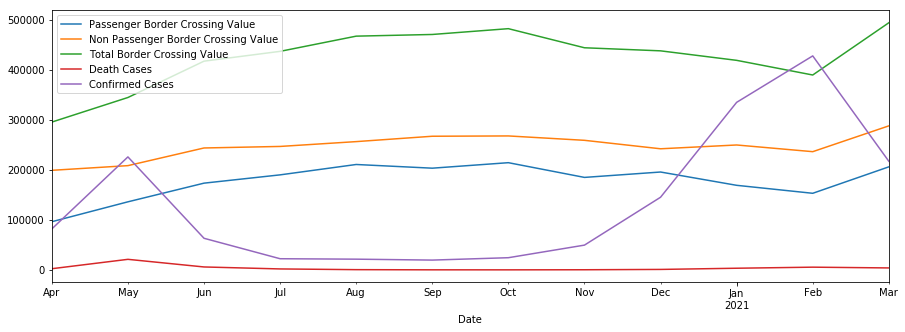

In [39]:
master_combined_df.plot(x='Date', figsize = (15,5))

# Inference 1

# Corelation Test

## H0 -> Both the data sets are not correlated
## H1 -> Both the data sets are correlated

In [56]:
def corr(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_temp = x-x_mean
    y_temp = y-y_mean
    numerator = np.sum(x_temp*y_temp)
    denx = np.sum(np.square(x-x_mean))
    deny = np.sum(np.square(y-y_mean))
    den = np.sqrt(denx*deny)
    return numerator/den

In [166]:
comparison = []
correlation_val = []

In [167]:
# Total Border Crossing Value VS Confirmed Cases

comparison.append("Total Border Crossing Value VS Confirmed Cases")
total_border_crossing_data = master_combined_df['Total Border Crossing Value']
confirmed_cases = master_combined_df['Confirmed Cases']
correlation_val.append(corr(total_border_crossing_data, confirmed_cases))

In [168]:
# Total Border Crossing Value VS Death Cases
comparison.append("Total Border Crossing Value VS Death Cases")
death_cases = master_combined_df['Death Cases']
correlation_val.append(corr(total_border_crossing_data, death_cases))

In [169]:
# Passenger Border Crossing Value VS Confirmed Cases
comparison.append("Passenger Border Crossing Value VS Confirmed Cases")
passenger_border_crossing_data = master_combined_df['Passenger Border Crossing Value']
correlation_val.append(corr(passenger_border_crossing_data, confirmed_cases))

In [170]:
# Passenger Border Crossing Value VS Death Cases
comparison.append("Passenger Border Crossing Value VS Death Cases")
correlation_val.append(corr(passenger_border_crossing_data, death_cases))

In [171]:
# Non Passenger Border Crossing Value VS Confirmed Cases
comparison.append("Non Passenger Border Crossing Value VS Confirmed Cases")
non_passenger_border_crossing_data = master_combined_df['Non Passenger Border Crossing Value']
correlation_val.append(corr(non_passenger_border_crossing_data, confirmed_cases))

In [172]:
# Non Passenger Border Crossing Value VS Death Cases
comparison.append("Non Passenger Border Crossing Value VS Death Cases")
correlation_val.append(corr(non_passenger_border_crossing_data, death_cases))

In [173]:
finalcomparison = pd.DataFrame({
    'Comparison': comparison,
    'Correlation coeffecient': correlation_val,
})
print("Comparison of Correlation Coeffecient")
display(finalcomparison)

Comparison of Correlation Coeffecient


,Comparison,Correlation coeffecient
0,Total Border Crossing Value VS Confirmed Cases,-0.285039
1,Total Border Crossing Value VS Death Cases,-0.515181
2,Passenger Border Crossing Value VS Confirmed C...,-0.346702
3,Passenger Border Crossing Value VS Death Cases,-0.484858
4,Non Passenger Border Crossing Value VS Confirm...,-0.179957
5,Non Passenger Border Crossing Value VS Death C...,-0.526362


Here, on a general level, we can see that the values between the border crossing values and the confirmed/ death cases are negatively correlated. To be more precise:

1. Total Border Crossing Value VS Confirmed Cases is less than 0.5, hence negatively correlated
2. Total Border Crossing Value VS Death Cases is greater than 0.5, hence not correlated but slightly since the value is just above 0.5
3. Passenger Border Crossing Value VS Confirmed Cases is less than 0.5, hence negatively correlated
4. Passenger Border Crossing Value VS Death Cases is less than 0.5, hence negatively correlated
5. Non Passenger Border Crossing Value VS Confirmed Cases is less than 0.5, hence negatively correlated
6. Non Passenger Border Crossing Value VS Death Cases is greater than 0.5, hence not correlated but slightly since the value is just above 0.5

As seen, confirmed cases have a much greater impact than death cases. As cases started to increase, people used to migrate less. Also non passenger vechiles had less impact than passenger vechiles.


# Inference 2

# KS TEST

## H0 -> Both the data sets follow the same distribution

## H1 -> Both the data sets do not follow the same distribution

In [76]:
def get_xy(x):

  n = len(x)
  x = sorted(x)
  x_cdf = []
  y_cdf = []
  y_curr = 0

  x_cdf.append(0)
  y_cdf.append(0)

  for i in x:
    y_curr += 1/n
    y_cdf.append(y_curr)
    x_cdf.append(i)

  return x_cdf,y_cdf

def draw_ecdf(x1, y1, x2, y2, max_diff, max_ind):
    plt.figure(figsize=(10,5))
    plt.step(x1, y1, where="post", label="CDF-D1")
    plt.step(x2, y2, where="post", label="CDF-D2")
    # plt.xticks(x1 + x2, rotation = 90)
    plt.yticks(np.arange(0, 1.1, 1/10))
    plt.title("Empirical CDF")
    plt.xlabel("Sample Points")
    plt.ylabel("Pr[X<x]")
    plt.scatter([max_ind],[0], color='red', marker='x', s=100, label=f'Max Diff {max_diff} at {max_ind}')
    # plt.scatter(x, [0]*len(x), color='red', marker='x', s=100, label='samples')
    plt.grid(which="both")
    plt.legend()
    plt.show()

def ks_2_sample_test(data1,data2, threshold=0.05, draw=True):
  x1, y1 = get_xy(data1)
  x2, y2 = get_xy(data2)

  n = int(min([max(x1),max(x2)])) +10

  y1_all = []
  temp=0
  for i in np.arange(n):
    ind = np.where(np.array(x1) == i)[0]
    if len(ind)==0:
      y1_all.append(temp)
    else:
      y1_all.append(y1[ind[-1]])
      temp = y1[ind[-1]]

  y2_all = []
  temp=0
  for i in np.arange(n):
    ind = np.where(np.array(x2) == i)[0]
    if len(ind)==0:
      y2_all.append(temp)
    else:
      y2_all.append(y2[ind[-1]])
      temp = y2[ind[-1]]

  diff=[]
  for i in range(n):
    diff.append( np.absolute( y1_all[i] - y2_all[i]  ) )

  max_diff = np.max(diff)

  max_ind = np.argmax(diff)

  if draw:
    draw_ecdf(x1,y1,x2,y2, max_diff, max_ind)

  if max_diff > threshold:
    print(f"Max value = {max_diff} > C: {threshold}, We reject H0")
  else:
    print(f"Max value = {max_diff} <= C: {threshold}, We reject H0")

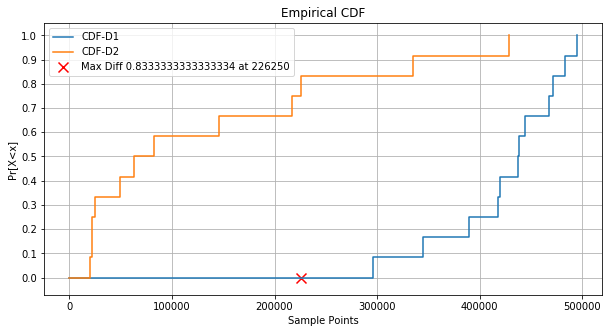

Max value = 0.8333333333333334 > C: 0.05, We reject H0


In [77]:
ks_2_sample_test(total_border_crossing_data, confirmed_cases)

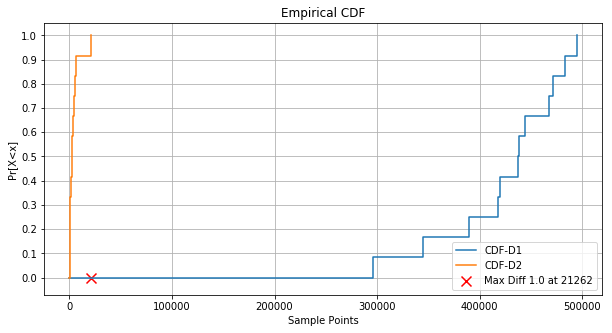

Max value = 1.0 > C: 0.05, We reject H0


In [78]:
ks_2_sample_test(total_border_crossing_data, death_cases)

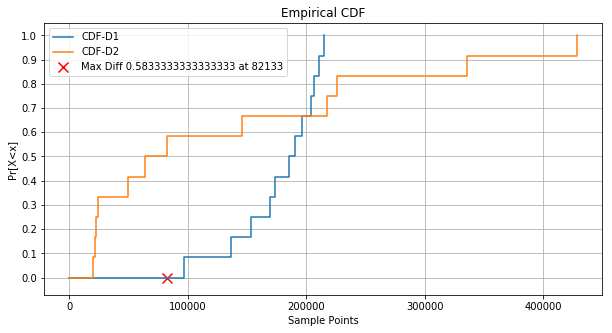

Max value = 0.5833333333333333 > C: 0.05, We reject H0


In [79]:
ks_2_sample_test(passenger_border_crossing_data, confirmed_cases)

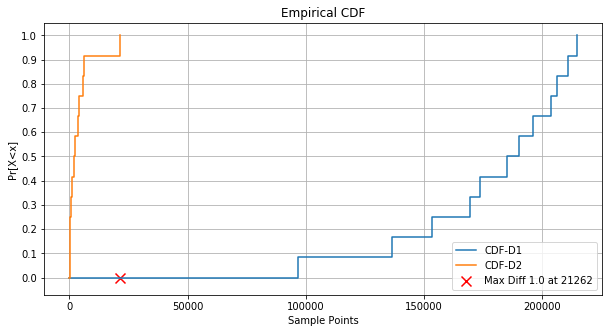

Max value = 1.0 > C: 0.05, We reject H0


In [80]:
ks_2_sample_test(passenger_border_crossing_data, death_cases)

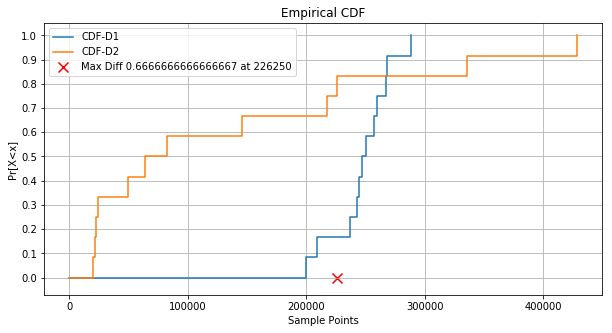

Max value = 0.6666666666666667 > C: 0.05, We reject H0


In [81]:
ks_2_sample_test(non_passenger_border_crossing_data, confirmed_cases)

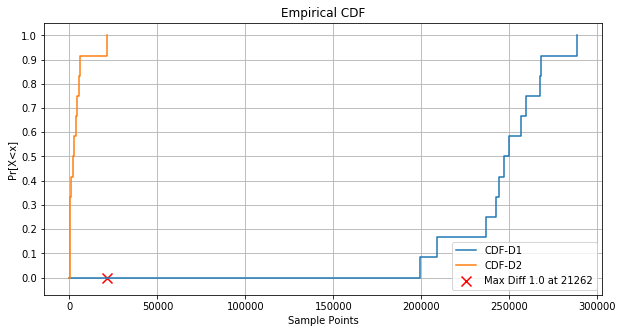

Max value = 1.0 > C: 0.05, We reject H0


In [83]:
ks_2_sample_test(non_passenger_border_crossing_data, death_cases)

For all the cases, we reject H0 i.e. all the combinations of the datasets do not follow the same distribution. As covid cases/ confirmation and border crossing data are inversely correlated, these data sets are bound not to follow the same distribution.

# Inference 3

# Chi Square

## Ho -> Distributions are Independent
## H1 -> Distributions are not independent

In [174]:
def chi_square(data,x,y):
  rows = data.shape[0]
  cols = data.shape[1]
  observed = data[[x,y]]
  observed.loc['Column_Total']= observed.sum(numeric_only=True, axis=0)
  observed.loc[:,'Row_Total'] = observed.sum(numeric_only=True, axis=1)

  expected = pd.DataFrame(columns=[x,y])

  for col in expected.columns:
    for ind in observed.index:
      expected.loc[ind,col] = (observed.loc[ind,'Row_Total'] * observed.loc['Column_Total', col])/observed.loc['Column_Total','Row_Total']
  

  Q_obs = np.sum(np.square(np.array((observed.iloc[:-1,:-1] - expected.iloc[:-1,:])).flatten())/np.array(expected.iloc[:-1,:]).flatten())

  print(f"Q_obs: {Q_obs}")

In [175]:
chi_square(master_combined_df, 'Total Border Crossing Value', 'Confirmed Cases')
chi_square(master_combined_df, 'Total Border Crossing Value', 'Death Cases')
chi_square(master_combined_df, 'Passenger Border Crossing Value', 'Confirmed Cases')
chi_square(master_combined_df, 'Passenger Border Crossing Value', 'Death Cases')
chi_square(master_combined_df, 'Non Passenger Border Crossing Value', 'Confirmed Cases')
chi_square(master_combined_df, 'Non Passenger Border Crossing Value', 'Death Cases')

Q_obs: 1106929.5158653043
Q_obs: 115793.8853924144
Q_obs: 883809.6411306558
Q_obs: 116436.0775214673
Q_obs: 891679.2935562562
Q_obs: 106566.51675903022


/Users/admin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/admin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/admin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In Chi-Square test, all the above values have a P value less than 0.05. Hence, we reject the hypotheis that the distributions are independent. All the features compared above are dependent.